#Import

Dataset: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/data

The data is compiled from http://ergast.com/mrd/

Title: "Speeding to Victory: A Predictive Modeling Approach in Formula 1"

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
result_df = pd.read_csv('/content/drive/MyDrive/Dibimbing/DS 22_Meida Rahma Al Kariim_Script Progress Final Project/Formula 1 World Championship (1950 - 2023)/results.csv', na_values=r'\N')
stats_df = pd.read_csv('/content/drive/MyDrive/Dibimbing/DS 22_Meida Rahma Al Kariim_Script Progress Final Project/Formula 1 World Championship (1950 - 2023)/status.csv', na_values=r'\N')
drivers_df = pd.read_csv('/content/drive/MyDrive/Dibimbing/DS 22_Meida Rahma Al Kariim_Script Progress Final Project/Formula 1 World Championship (1950 - 2023)/drivers.csv', na_values=r'\N')
races_df = pd.read_csv('/content/drive/MyDrive/Dibimbing/DS 22_Meida Rahma Al Kariim_Script Progress Final Project/Formula 1 World Championship (1950 - 2023)/races.csv', na_values=r'\N')
constructor_df = pd.read_csv('/content/drive/MyDrive/Dibimbing/DS 22_Meida Rahma Al Kariim_Script Progress Final Project/Formula 1 World Championship (1950 - 2023)/constructors.csv', na_values=r'\N')
driver_standings_df = pd.read_csv('/content/drive/MyDrive/Dibimbing/DS 22_Meida Rahma Al Kariim_Script Progress Final Project/Formula 1 World Championship (1950 - 2023)/driver_standings.csv', na_values=r'\N')

#to make all columns visible
pd.get_option("display.max_columns",None)

In [4]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26074 non-null  float64
 5   grid             26080 non-null  int64  
 6   position         15207 non-null  float64
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             7251 non-null   object 
 12  milliseconds     7250 non-null   float64
 13  fastestLap       7615 non-null   float64
 14  rank             7831 non-null   float64
 15  fastestLapTime   7615 non-null   object 
 16  fastestLapSpeed  7615 non-null   float64
 17  statusId    

In [5]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [6]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   driverId     857 non-null    int64  
 1   driverRef    857 non-null    object 
 2   number       54 non-null     float64
 3   code         100 non-null    object 
 4   forename     857 non-null    object 
 5   surname      857 non-null    object 
 6   dob          857 non-null    object 
 7   nationality  857 non-null    object 
 8   url          857 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 60.4+ KB


In [7]:
races_df.sample(5)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
904,907,2014,8,70,Austrian Grand Prix,2014-06-22,12:00:00,http://en.wikipedia.org/wiki/2014_Austrian_Gra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,591,1974,2,18,Brazilian Grand Prix,1974-01-27,NaN,http://en.wikipedia.org/wiki/1974_Brazilian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,348,2010,12,11,Hungarian Grand Prix,2010-08-01,12:00:00,http://en.wikipedia.org/wiki/2010_Hungarian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,673,1968,7,38,British Grand Prix,1968-07-20,NaN,http://en.wikipedia.org/wiki/1968_British_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,205,1998,15,20,Luxembourg Grand Prix,1998-09-27,NaN,http://en.wikipedia.org/wiki/1998_Luxembourg_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         370 non-null    object
 7   url          1101 non-null   object
 8   fp1_date     66 non-null     object
 9   fp1_time     44 non-null     object
 10  fp2_date     66 non-null     object
 11  fp2_time     44 non-null     object
 12  fp3_date     54 non-null     object
 13  fp3_time     35 non-null     object
 14  quali_date   66 non-null     object
 15  quali_time   44 non-null     object
 16  sprint_date  12 non-null     object
 17  sprint_time  9 non-null      object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


In [9]:
constructor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [10]:
driver_standings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34124 non-null  int64  
 1   raceId             34124 non-null  int64  
 2   driverId           34124 non-null  int64  
 3   points             34124 non-null  float64
 4   position           34124 non-null  int64  
 5   positionText       34124 non-null  object 
 6   wins               34124 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


Observation :
- The number of data is different

#Data Preparation

## Data Understanding

because there are still many separate dataset groups, a merger is necessary.

Observation:
- On the feature `'raceid'` owned in the dataset group `'result_df'`, `'races_df'`, and `'driver_standands_df'`
- In the `'driverid'` feature in the dataset group `'result_df', 'drivers_df'`, and `'driver_standands_df'`
- In the feature `'Constructorid'` is owned in the dataset group `'result_df'` and `'constructor_df'`
- On the `'statusid'` feature in the dataset group `'result_df'` and `'stats_df'`

In [11]:
races_df['raceId']

0          1
1          2
2          3
3          4
4          5
        ... 
1096    1116
1097    1117
1098    1118
1099    1119
1100    1120
Name: raceId, Length: 1101, dtype: int64

In [12]:
races = races_df.raceId.astype(int)

In [13]:
mer1 = pd.merge(result_df, races, on ='raceId')
mer2 = pd.merge(mer1, drivers_df, on = 'driverId')
mer3 = pd.merge(mer2, driver_standings_df, on = 'driverId')
mer4 = pd.merge(mer3, constructor_df, on ='constructorId')
df = pd.merge(mer4, stats_df, on ='statusId')
pd.get_option("display.max_columns",None)
df

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.3,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537622,19879,826,518,150,27.0,4,8.0,8,8,0.0,180,NaN,NaN,NaN,NaN,NaN,NaN,127,darter,NaN,NaN,Duane,Carter,1913-05-05,American,http://en.wikipedia.org/wiki/Duane_Carter,43299,835,0.0,30,30,0,deidt,Deidt,American,http://en.wikipedia.org/wiki/Deidt,+20 Laps
3537623,19879,826,518,150,27.0,4,8.0,8,8,0.0,180,NaN,NaN,NaN,NaN,NaN,NaN,127,darter,NaN,NaN,Duane,Carter,1913-05-05,American,http://en.wikipedia.org/wiki/Duane_Carter,43366,836,0.0,35,35,0,deidt,Deidt,American,http://en.wikipedia.org/wiki/Deidt,+20 Laps
3537624,19879,826,518,150,27.0,4,8.0,8,8,0.0,180,NaN,NaN,NaN,NaN,NaN,NaN,127,darter,NaN,NaN,Duane,Carter,1913-05-05,American,http://en.wikipedia.org/wiki/Duane_Carter,43436,837,0.0,38,38,0,deidt,Deidt,American,http://en.wikipedia.org/wiki/Deidt,+20 Laps
3537625,19879,826,518,150,27.0,4,8.0,8,8,0.0,180,NaN,NaN,NaN,NaN,NaN,NaN,127,darter,NaN,NaN,Duane,Carter,1913-05-05,American,http://en.wikipedia.org/wiki/Duane_Carter,43508,838,0.0,42,42,0,deidt,Deidt,American,http://en.wikipedia.org/wiki/Deidt,+20 Laps


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537627 entries, 0 to 3537626
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           float64
 5   grid               int64  
 6   position_x         float64
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time               object 
 12  milliseconds       float64
 13  fastestLap         float64
 14  rank               float64
 15  fastestLapTime     object 
 16  fastestLapSpeed    float64
 17  statusId           int64  
 18  driverRef          object 
 19  number_y           float64
 20  code               object 
 21  forename           object 
 22  surname            object 
 23  dob                object 
 24  nationality_x      object 
 25  url_x             

Observation:
1. There are some unnecessary features such as
   - `'url_y','url_x'` because the contents of the column are url
   - `'raceId_y'`, `'points_y'`, `nationality_y`, `'number_y'` because there are doubles namely x and y
   - `'positionText'` because it has been represented in the 'position'
   - `'code'` because it has been represented by the 'name'
   - `'fastestLapTime'`,`'time_y'`, `'time_y'`, because it has been represented in Wins
   - `'driverRef', 'constructorRef'`, does not really affect.
2. Many features whose names are not in accordance with the contents.
3. The name of the driver is still separate using Forename and Surname, it is better to be combined.
4. Date of Birth or `dob` still uses Dtype Objects, it is better to replace it with a date format.
5. Make a new feature that is 'Age' to find out the age of the drivers.
6. Some features still use Dtype Objects, it should be replaced with numerical.

In [15]:
# group column names based on type
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [16]:
cat

['positionText_x',
 'time',
 'fastestLapTime',
 'driverRef',
 'code',
 'forename',
 'surname',
 'dob',
 'nationality_x',
 'url_x',
 'positionText_y',
 'constructorRef',
 'name',
 'nationality_y',
 'url_y',
 'status']

In [17]:
num

['resultId',
 'raceId_x',
 'driverId',
 'constructorId',
 'number_x',
 'grid',
 'position_x',
 'positionOrder',
 'points_x',
 'laps',
 'milliseconds',
 'fastestLap',
 'rank',
 'fastestLapSpeed',
 'statusId',
 'number_y',
 'driverStandingsId',
 'raceId_y',
 'points_y',
 'position_y',
 'wins']

###Feature Enginering

In [18]:
# some unnecessary features
df = df.drop(['url_y','url_x','position_x', 'fastestLapTime','positionText_x','time','driverRef',
              'constructorRef','nationality_y','positionText_y','raceId_y','points_y','code','number_y'],1)

In [19]:
# Many features whose names are not in accordance with the contents
col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name':'team','nationality_x':'nationality',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}

df.rename(columns=col_name,inplace=True)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,forename,surname,dob,nationality,driverStandingsId,position,wins,team,status
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,Lewis,Hamilton,1985-01-07,British,1,1,1,McLaren,Finished
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,Lewis,Hamilton,1985-01-07,British,9,1,1,McLaren,Finished
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,Lewis,Hamilton,1985-01-07,British,27,3,1,McLaren,Finished
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,Lewis,Hamilton,1985-01-07,British,48,2,1,McLaren,Finished
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,Lewis,Hamilton,1985-01-07,British,69,3,1,McLaren,Finished


In [20]:
#The name of the driver is still separate using Forename and Surname, it is better to be combined.
df['driver_name'] = df['forename']+' '+df['surname']

In [21]:
#drop the Foreename and Surname column because it has been joined before in one column
df = df.drop(['forename','surname'],1)

In [22]:
df['driver_name'].value_counts()

Fernando Alonso       137640
Kimi Räikkönen        124256
Lewis Hamilton        103684
Rubens Barrichello    100408
Jenson Button          99189
                       ...  
Juan Jover                 1
Piero Dusio                1
Mike Harris                1
Syd van der Vyver          1
Jonathan Williams          1
Name: driver_name, Length: 850, dtype: int64

In [23]:
df['driverId'].value_counts()

4      137640
8      124256
1      103684
22     100408
18      99189
        ...  
782         1
760         1
472         1
474         1
395         1
Name: driverId, Length: 850, dtype: int64

karena driver_name dan driverId sama maka perlu di drop salah satunya

In [24]:
df = df.drop(['driverId'],1)

In [25]:
#Date of Birth or dob still uses Dtype Objects, it is better to replace it with a date format.
pd.to_datetime(df.dob)

0         1985-01-07
1         1985-01-07
2         1985-01-07
3         1985-01-07
4         1985-01-07
             ...    
3537622   1913-05-05
3537623   1913-05-05
3537624   1913-05-05
3537625   1913-05-05
3537626   1913-05-05
Name: dob, Length: 3537627, dtype: datetime64[ns]

In [26]:
df['dob'] = pd.to_datetime(df['dob'])

In [27]:
#Make a new feature that is 'Age' to find out the age of the drivers.
from datetime import datetime

dates = datetime.today()-df['dob']
age = dates.dt.days/365

In [28]:
df['age'] = round(age)
pd.set_option('display.max_columns', None)
df.sample(5)

,resultId,racerId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,dob,nationality,driverStandingsId,position,wins,team,status,driver_name,age
1527908,20880,845,4,9.0,24,8,4.0,65,NaN,61.0,3.0,192.713,11,1977-05-10,German,12656,16,0,Renault,+1 Lap,Nick Heidfeld,47.0
1935630,2574,141,3,5.0,5,18,0.0,4,NaN,NaN,NaN,NaN,4,1975-06-30,German,11751,4,3,Williams,Collision,Ralf Schumacher,48.0
2355237,1511,89,16,4.0,17,17,0.0,34,NaN,17.0,15.0,205.295,6,1977-01-28,Japanese,12012,21,0,BAR,Gearbox,Takuma Sato,47.0
135756,7049,322,1,27.0,1,3,4.0,71,5878980.0,NaN,NaN,NaN,1,1960-03-21,Brazilian,19894,3,2,McLaren,Finished,Ayrton Senna,64.0
587244,21329,864,6,5.0,2,2,18.0,66,5952340.0,46.0,3.0,191.761,1,1981-07-29,Spanish,17975,11,0,Ferrari,Finished,Fernando Alonso,42.0


In [29]:
df = df.drop(['dob'],1)
df.drop('statusId',1,inplace=True)

In [30]:
#Some features still use Dtype Objects, it should be replaced with numerical.
l = ['number','timetaken_in_millisec','fastestLap','rank','max_speed']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')

##Missing Value

In [31]:
#To check which columns have a missing value
df.isnull().sum()

resultId                       0
racerId                        0
constructorId                  0
number                       160
grid                           0
positionOrder                  0
points                         0
laps                           0
timetaken_in_millisec    2172879
fastestLap               2140657
rank                     2105375
max_speed                2140657
nationality                    0
driverStandingsId              0
position                       0
wins                           0
team                           0
status                         0
driver_name                    0
age                            0
dtype: int64

In [32]:
# Portion missing values considering all columns
((df.shape[0] - df.dropna().shape[0])/df.shape[0])*100

76.30866679839339

In [33]:
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage
0,timetaken_in_millisec,2172879,61.42
1,max_speed,2140657,60.51
2,fastestLap,2140657,60.51
3,rank,2105375,59.51


Observation:
1. 'Rank' is ranked ratings in the race results. So if there is a missing value, it is better to replace it 0
2. 'Fastest lap' is the fastest lap time achieved by racers in a particular race, so it is filled in 0
3. For 'Max_speed' and 'timetaken_in_millisec' better using median

###Handling Missing Value

In [34]:
# In order not to have a lot of data that is lost, it will be filled in 0 on the feature rank and fastestlap to fill the missing value
df[['rank','fastestLap']] = df[['rank','fastestLap']].fillna(0)
df['timetaken_in_millisec'] = df['timetaken_in_millisec'].fillna(df['timetaken_in_millisec'].median())
df['max_speed']= df['max_speed'].fillna(df['max_speed'].median())

In [35]:
df= df.dropna()

In [36]:
#Make sure
df.isnull().sum()

resultId                 0
racerId                  0
constructorId            0
number                   0
grid                     0
positionOrder            0
points                   0
laps                     0
timetaken_in_millisec    0
fastestLap               0
rank                     0
max_speed                0
nationality              0
driverStandingsId        0
position                 0
wins                     0
team                     0
status                   0
driver_name              0
age                      0
dtype: int64

##Duplicated Data

In [37]:
df.duplicated().sum()

0

In [38]:
df.duplicated().any()

False

The data is not duplicated so there is no need to handle duplicated data

##Adjust Data


Because we will predict who will win the race, we need to apply several filters, namely the driver must have the contents of the 'Status' column (Finished) and 'Max Speed' and 'Fatest Lap' must be more than the average.

In [39]:
baseline = df[df['status'] == 'Finished']
baseline.tail()

,resultId,racerId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,nationality,driverStandingsId,position,wins,team,status,driver_name,age
1363657,23346,967,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,French,72083,9,0,Manor Marussia,Finished,Esteban Ocon,27.0
1363658,23346,967,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,French,72123,9,0,Manor Marussia,Finished,Esteban Ocon,27.0
1363659,23346,967,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,French,72143,10,0,Manor Marussia,Finished,Esteban Ocon,27.0
1363660,23346,967,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,French,72163,10,0,Manor Marussia,Finished,Esteban Ocon,27.0
1363661,23346,967,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,French,72184,10,0,Manor Marussia,Finished,Esteban Ocon,27.0


In [40]:
mean = df.max_speed.mean()
mean2 = df.fastestLap.mean()
baseline = baseline[baseline['max_speed']>mean]
baseline.head()

,resultId,racerId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,nationality,driverStandingsId,position,wins,team,status,driver_name,age
0,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0


In [41]:
baseline = baseline[baseline['fastestLap']>mean2]
baseline

,resultId,racerId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,nationality,driverStandingsId,position,wins,team,status,driver_name,age
0,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,British,1,1,1,McLaren,Finished,Lewis Hamilton,39.0
1,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,British,9,1,1,McLaren,Finished,Lewis Hamilton,39.0
2,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,British,27,3,1,McLaren,Finished,Lewis Hamilton,39.0
3,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,British,48,2,1,McLaren,Finished,Lewis Hamilton,39.0
4,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,British,69,3,1,McLaren,Finished,Lewis Hamilton,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363488,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,Dutch,72079,19,0,AlphaTauri,Finished,Nyck de Vries,29.0
1363489,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,Dutch,72119,20,0,AlphaTauri,Finished,Nyck de Vries,29.0
1363490,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,Dutch,72139,20,0,AlphaTauri,Finished,Nyck de Vries,29.0
1363491,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,Dutch,72159,20,0,AlphaTauri,Finished,Nyck de Vries,29.0


#EDA

##Standard EDA

###Statistical summary

In [42]:
# group column names based on type
cat = []
num = []
for i in baseline.columns:
    if baseline[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [43]:
cat

['nationality', 'team', 'status', 'driver_name']

In [44]:
num

['resultId',
 'racerId',
 'constructorId',
 'number',
 'grid',
 'positionOrder',
 'points',
 'laps',
 'timetaken_in_millisec',
 'fastestLap',
 'rank',
 'max_speed',
 'driverStandingsId',
 'position',
 'wins',
 'age']

In [45]:
baseline[num].describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,445698.0,1.703918e+04,10091.849461,1.000,1836.000,22377.000,24453.00,26083.00
racerId,445698.0,6.789362e+02,432.371170,1.000,89.000,911.000,1022.00,1110.00
constructorId,445698.0,4.454819e+01,67.115594,1.000,4.000,7.000,117.00,214.00
number,445698.0,1.713315e+01,19.209771,1.000,5.000,9.000,21.00,99.00
grid,445698.0,6.967696e+00,5.154711,0.000,3.000,6.000,10.00,24.00
positionOrder,445698.0,5.364819e+00,3.533173,1.000,2.000,5.000,8.00,19.00
points,445698.0,9.021497e+00,7.389520,0.000,3.000,8.000,15.00,26.00
laps,445698.0,5.797859e+01,8.419201,31.000,53.000,57.000,66.00,87.00
timetaken_in_millisec,445698.0,5.482310e+06,722290.548496,4252092.000,5143746.000,5390917.000,5571635.00,10810318.00
fastestLap,445698.0,4.640073e+01,12.816536,17.000,39.000,48.000,55.00,85.00


In [46]:
# value counts num columns
for col in num:
  print(f"Value counts of {col} column")
  print(baseline[col].value_counts(), '\n')

Value counts of resultId column
26032    372
20635    372
21448    372
21425    372
21236    372
        ... 
25996     12
26029     12
26036     12
24942      2
24941      2
Name: resultId, Length: 2066, dtype: int64 

Value counts of racerId column
855     3759
892     3624
868     3501
891     3359
911     3283
        ... 
991      234
339      212
1098     121
1028     115
1074     115
Name: racerId, Length: 236, dtype: int64 

Value counts of constructorId column
6      91148
131    68734
9      54111
1      53701
4      31776
3      23919
10     16575
15     10661
117     9969
7       9891
5       9117
210     8924
214     8885
51      7691
2       7364
208     6111
11      6008
16      5448
211     5226
213     4845
23      4403
19       696
205      361
206       76
207       58
Name: constructorId, dtype: int64 

Value counts of number column
5.0     42630
44.0    36386
3.0     32147
7.0     30872
1.0     29671
11.0    25849
6.0     22107
2.0     19842
77.0    18957
14.0    1

Observation:
* Overall, the minimum and maximum values make sense for each column
* Mean ~ 50% (Median) in `'resultId', 'grid', 'positionOrder', 'points', 'laps', 'fastestLap', 'rank', 'max_speed', 'position', 'age'` column, indicating somewhat a symmetrical distribution
* ` 'number', 'timetaken_in_millisec', 'wins',` indicating skew

In [47]:
# describe method on categorical data
baseline[cat].describe().T

,count,unique,top,freq
nationality,445698,26,British,82988
team,445698,25,Ferrari,91148
status,445698,1,Finished,445698
driver_name,445698,81,Lewis Hamilton,50554


In [48]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in cat:
  print(f"Value counts of {col} column")
  print(baseline[col].value_counts(), '\n')

Value counts of nationality column
British          82988
German           82828
Finnish          59385
Spanish          53736
Brazilian        35449
Australian       28790
Mexican          20936
Italian          16476
French           15955
Dutch            14620
Canadian          7123
Monegasque        6785
Danish            4988
Japanese          3286
Russian           2942
Polish            2520
Thai              1944
Colombian         1919
Venezuelan         864
Austrian           718
Swiss              440
Chinese            340
Swedish            300
Belgian            271
American            70
New Zealander       25
Name: nationality, dtype: int64 

Value counts of team column
Ferrari           91148
Mercedes          68734
Red Bull          54111
McLaren           53701
Renault           31776
Williams          23919
Force India       16575
Sauber            10661
Aston Martin       9969
Toyota             9891
Toro Rosso         9117
Haas F1 Team       8924
Alpine F1 Team   

- Because we only have 1 unique values in the 'status' column, it should be dropped.

In [49]:
baseline = baseline.drop(['status'],1)

###Univariate Analysis

#### Boxplot to detect outliers

In [50]:
cols = [ 'number',
 'grid',
 'positionOrder',
 'points',
 'laps',
 'timetaken_in_millisec',
 'fastestLap',
 'rank',
 'max_speed',
 'position',
 'wins',
 'age']

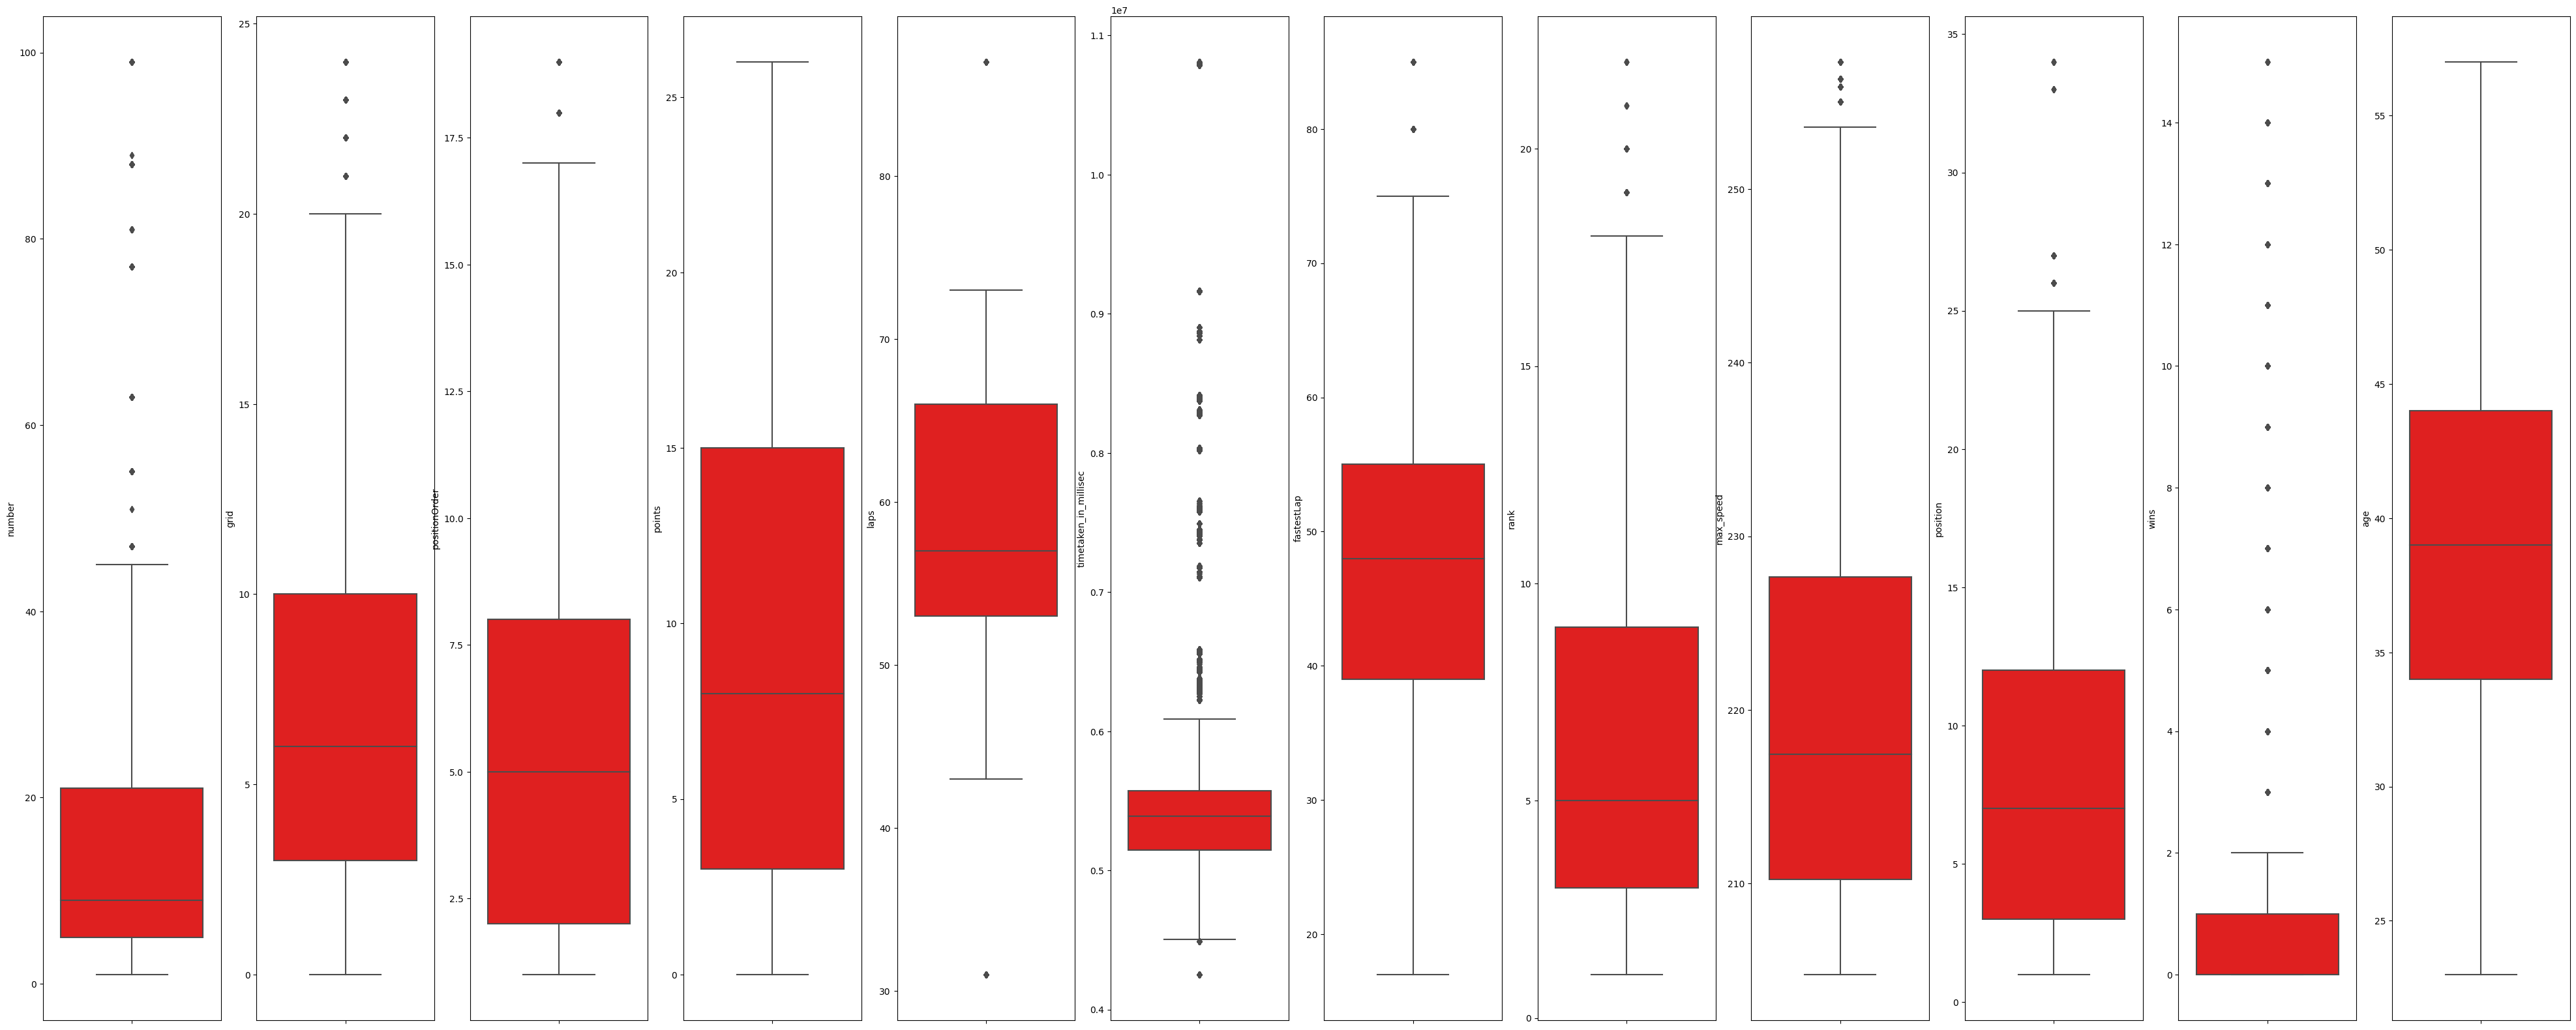

In [51]:
# adjust the figure size for better readability
plt.figure(figsize=(50,20))

# plotting
features = cols
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=baseline[features[i]], color='red')


Obervation:
1. Almost all have an outlier except the 'Points' and 'Age' columns.


####KDE plot for knowing the distribution form

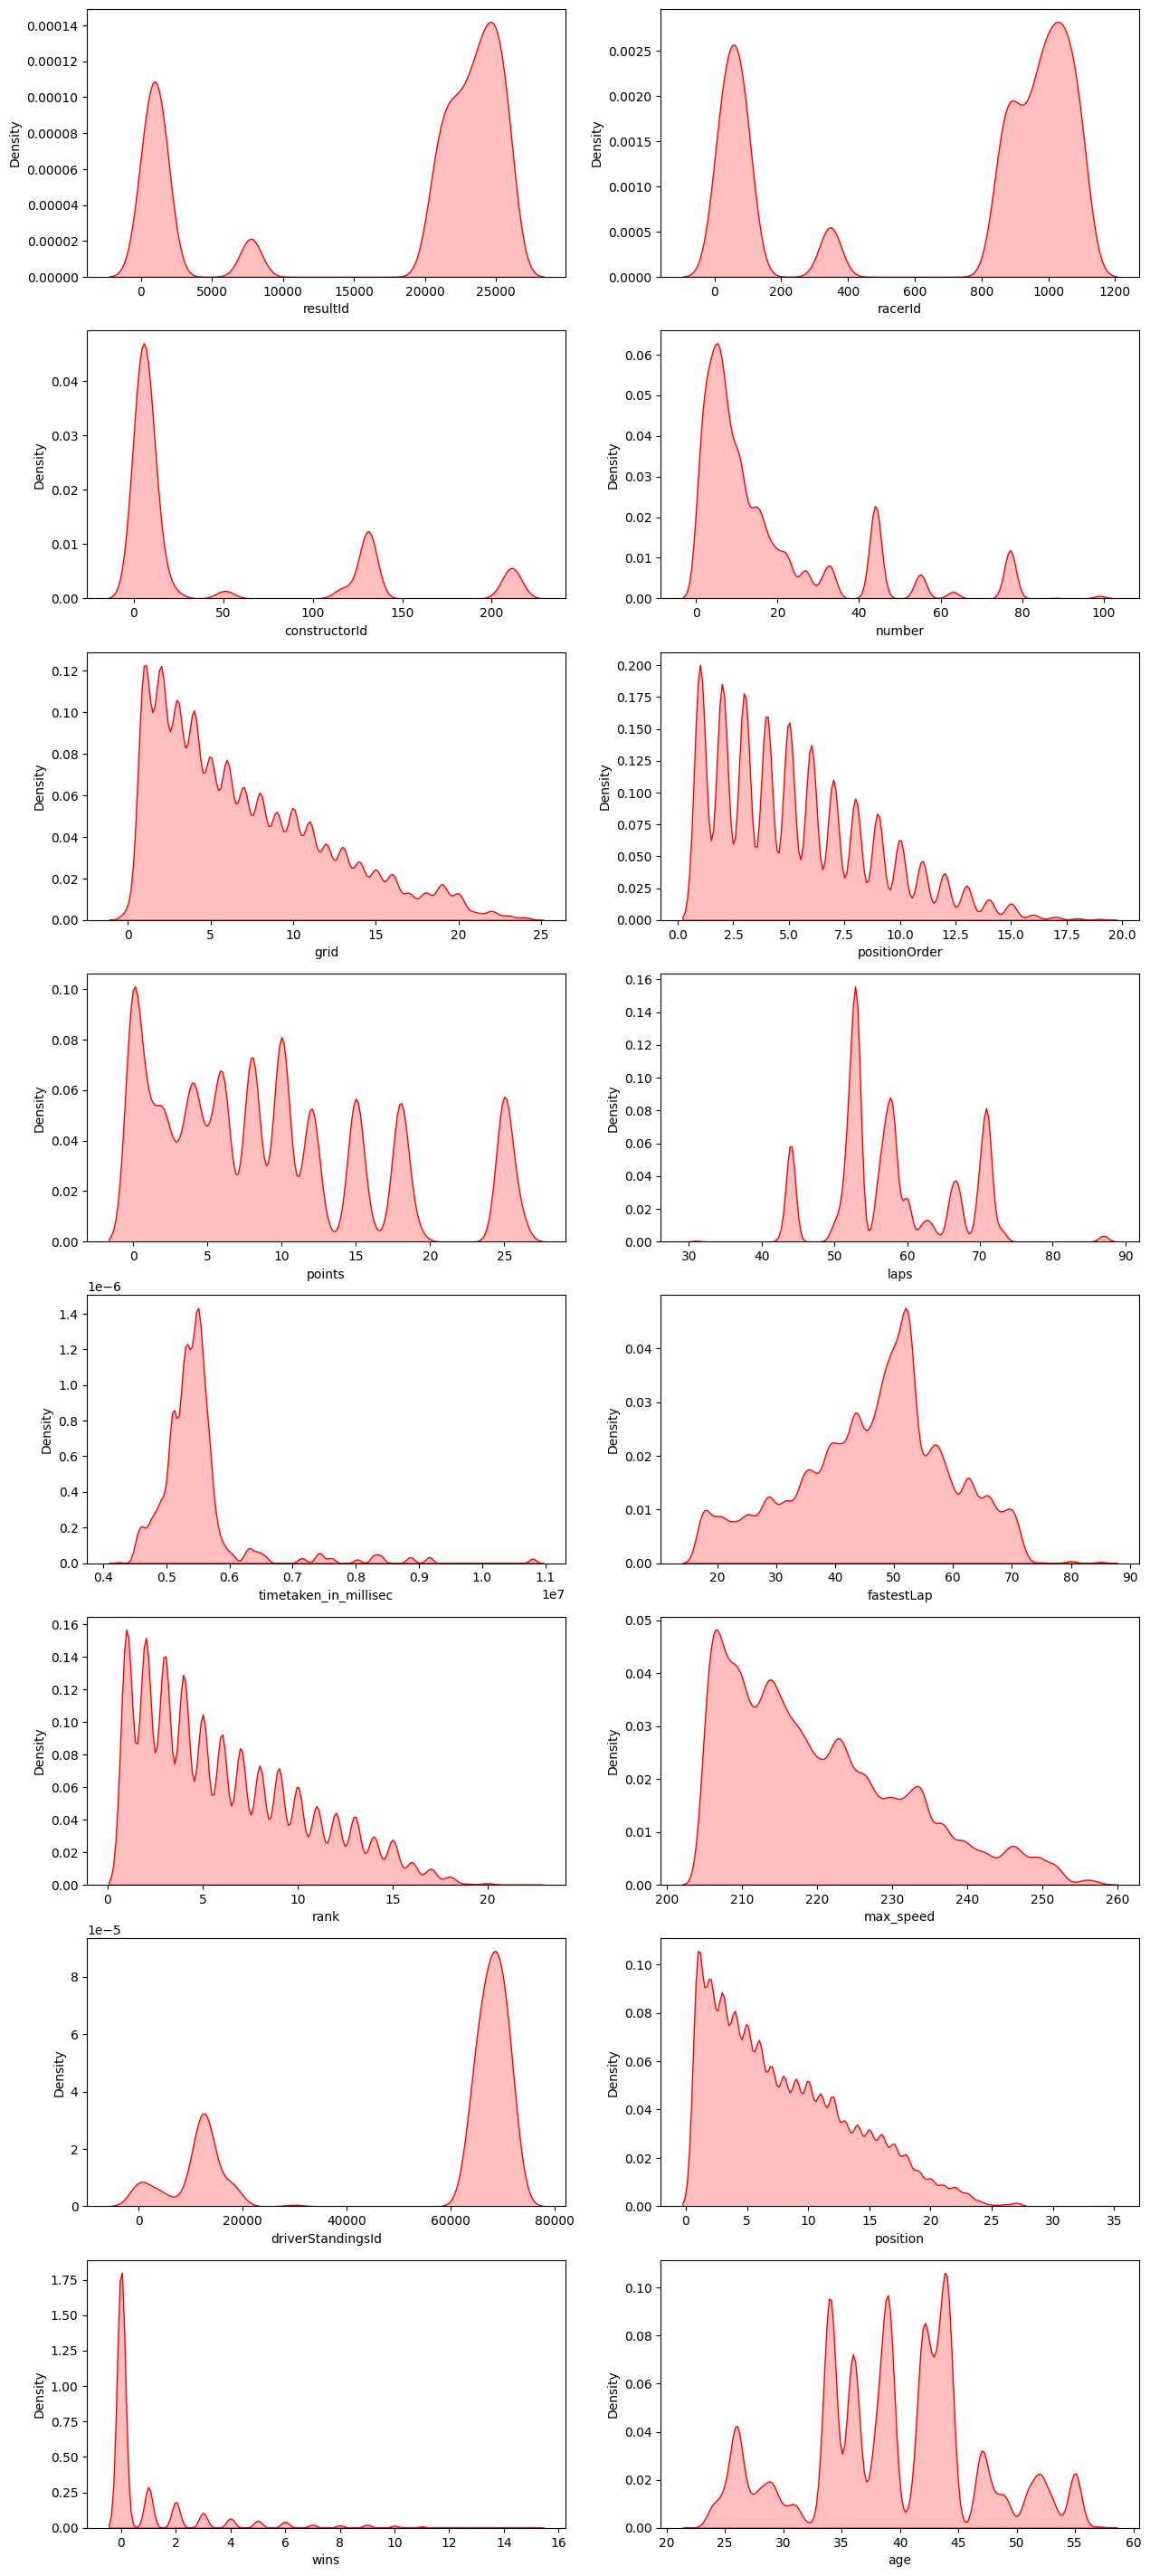

In [52]:
plt.figure(figsize=(15,50))
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(baseline[i],shade=True,color='red')
plt.show()

Observation:
1. `Age` at most at the age of 30 to 45
2. `'constructorid', 'number', 'timetaken', 'wins'` indicated Right Skew
3. `driverstandingId` indicated left Skew
4. (no need to transform them to approximate normal distribution if we later want to do modelling)

####Handling Outlier

Checking for skewness in the data, Skewness is used to check the normality of the data by ranging from -1 to 1.

- -1 --> Left skewed
- 0 --> Normal distribution
- 1 --> Right skewed

In [53]:
baseline.skew()

resultId                -0.861733
racerId                 -0.641667
constructorId            1.402042
number                   1.822331
grid                     0.875806
positionOrder            0.791306
points                   0.737578
laps                     0.390057
timetaken_in_millisec    3.539227
fastestLap              -0.310538
rank                     0.737932
max_speed                0.788651
driverStandingsId       -1.043894
position                 0.728690
wins                     2.846032
age                     -0.025321
dtype: float64

Observation:
1. `constructorId, number, timetaken_in_millisec, wins` are right skew
2. `driverStandingsId` is left skew

In [54]:
stat_desc = baseline.describe().T
stat_desc.columns = ['count', 'mean', 'std', 'min', 'q1', 'median', 'q3', 'max']
stat_desc['IQR'] = stat_desc['q3'] - stat_desc['q1']
stat_desc

,count,mean,std,min,q1,median,q3,max,IQR
resultId,445698.0,1.703918e+04,10091.849461,1.000,1836.000,22377.000,24453.00,26083.00,22617.000
racerId,445698.0,6.789362e+02,432.371170,1.000,89.000,911.000,1022.00,1110.00,933.000
constructorId,445698.0,4.454819e+01,67.115594,1.000,4.000,7.000,117.00,214.00,113.000
number,445698.0,1.713315e+01,19.209771,1.000,5.000,9.000,21.00,99.00,16.000
grid,445698.0,6.967696e+00,5.154711,0.000,3.000,6.000,10.00,24.00,7.000
positionOrder,445698.0,5.364819e+00,3.533173,1.000,2.000,5.000,8.00,19.00,6.000
points,445698.0,9.021497e+00,7.389520,0.000,3.000,8.000,15.00,26.00,12.000
laps,445698.0,5.797859e+01,8.419201,31.000,53.000,57.000,66.00,87.00,13.000
timetaken_in_millisec,445698.0,5.482310e+06,722290.548496,4252092.000,5143746.000,5390917.000,5571635.00,10810318.00,427889.000
fastestLap,445698.0,4.640073e+01,12.816536,17.000,39.000,48.000,55.00,85.00,16.000


In [55]:
# Outlier based on IQR
iqr = stat_desc.copy()

# Max right value = Q3 + 1.5 IQR
iqr['max_right'] = iqr['q3'] + 1.5 * iqr['IQR']

# Max left value = Q1 - 1.5 IQR
iqr['max_left'] = iqr['q1'] - 1.5 * iqr['IQR']

iqr['left_outlier'] = iqr['min'] < iqr['max_left']
iqr['right_outlier'] = iqr['max'] > iqr['max_right']

iqr.T

,resultId,racerId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,driverStandingsId,position,wins,age
count,445698.0,445698.0,445698.0,445698.0,445698.0,445698.0,445698.0,445698.0,445698.0,445698.0,445698.0,445698.0,445698.0,445698.0,445698.0,445698.0
mean,17039.184405,678.936194,44.548185,17.133148,6.967696,5.364819,9.021497,57.978593,5482309.765729,46.400729,6.093103,220.150338,52536.984665,7.933641,0.958844,39.295287
std,10091.849461,432.37117,67.115594,19.209771,5.154711,3.533173,7.38952,8.419201,722290.548496,12.816536,4.210509,11.820271,25746.395781,5.659024,2.018294,7.299259
min,1.0,1.0,1.0,1.0,0.0,1.0,0.0,31.0,4252092.0,17.0,1.0,204.764,1.0,1.0,0.0,23.0
q1,1836.0,89.0,4.0,5.0,3.0,2.0,3.0,53.0,5143746.0,39.0,3.0,210.237,17930.0,3.0,0.0,34.0
median,22377.0,911.0,7.0,9.0,6.0,5.0,8.0,57.0,5390917.0,48.0,5.0,217.434,66967.0,7.0,0.0,39.0
q3,24453.0,1022.0,117.0,21.0,10.0,8.0,15.0,66.0,5571635.0,55.0,9.0,227.64,69439.0,12.0,1.0,44.0
max,26083.0,1110.0,214.0,99.0,24.0,19.0,26.0,87.0,10810318.0,85.0,22.0,257.32,72187.0,34.0,15.0,57.0
IQR,22617.0,933.0,113.0,16.0,7.0,6.0,12.0,13.0,427889.0,16.0,6.0,17.403,51509.0,9.0,1.0,10.0
max_right,58378.5,2421.5,286.5,45.0,20.5,17.0,33.0,85.5,6213468.5,79.0,18.0,253.7445,146702.5,25.5,2.5,59.0


Seems some columns are skewed a lot, removal of the outliers will normalize the data a bit

In [56]:
# Filter for left side of IQR
filterlapsL = baseline['laps'] >= iqr['max_right'].laps
filtertimetaken_in_millisecL = baseline['timetaken_in_millisec'] >= iqr['max_right'].timetaken_in_millisec

# Combine left side filters using logical AND
filter_left = filterlapsL & filtertimetaken_in_millisecL

# Filter for right side of IQR
filternumber = baseline['number'] <= iqr['max_right'].number
filtergrid = baseline['grid'] <= iqr['max_right'].grid
filterpositionOrder = baseline['positionOrder'] <= iqr['max_right'].positionOrder
filterlaps = baseline['laps'] <= iqr['max_right'].laps
filtertimetaken_in_millisec = baseline['timetaken_in_millisec'] <= iqr['max_right'].timetaken_in_millisec
filterfastestLap = baseline['fastestLap'] <= iqr['max_right'].fastestLap
filtermax_speed = baseline['max_speed'] <= iqr['max_right'].max_speed
filterposition = baseline['position'] <= iqr['max_right'].position
filterwins = baseline['wins'] <= iqr['max_right'].wins

# Combine right side filters using logical AND
filter_right = filternumber & filtergrid & filterpositionOrder & filterlaps & filtertimetaken_in_millisec & filterfastestLap  & filtermax_speed & filterposition & filterwins

# Combine both sides using logical OR
iqrfiltered = baseline[filter_left | filter_right]
iqrfiltered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 323691 entries, 0 to 1363492
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   resultId               323691 non-null  int64  
 1   racerId                323691 non-null  int64  
 2   constructorId          323691 non-null  int64  
 3   number                 323691 non-null  float64
 4   grid                   323691 non-null  int64  
 5   positionOrder          323691 non-null  int64  
 6   points                 323691 non-null  float64
 7   laps                   323691 non-null  int64  
 8   timetaken_in_millisec  323691 non-null  float64
 9   fastestLap             323691 non-null  float64
 10  rank                   323691 non-null  float64
 11  max_speed              323691 non-null  float64
 12  nationality            323691 non-null  object 
 13  driverStandingsId      323691 non-null  int64  
 14  position               323691 non-n

In [57]:
#check again
iqrfiltered.skew()

resultId                -0.579748
racerId                 -0.358743
constructorId            1.874195
number                   1.610955
grid                     0.726056
positionOrder            0.711281
points                   0.901661
laps                     0.187239
timetaken_in_millisec   -0.521604
fastestLap              -0.308700
rank                     0.662456
max_speed                0.827101
driverStandingsId       -0.818470
position                 0.604366
wins                     1.947289
age                     -0.256653
dtype: float64

Almost all columns have been normally distributed, only the `'Wins', 'constructorId', 'driverId', 'number'` are right skewed. Skewness can be normalized during ML part.

###Bivariate Analysis

####Handle Categorical Data

I have choosen LabelEncoding instead of one hot encoding, because one hot will give a various new columns based on the unique value. LabelEncoding to the rescue!

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
# group column names based on type
cat = []
num = []
for i in baseline.columns:
    if baseline[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [60]:
cat

['nationality', 'team', 'driver_name']

In [61]:
# encoding categorical columns in baseline
df_base = baseline.copy()

for i in cat:
   df_base[i] = le.fit_transform(df_base[i])
df_base

,resultId,racerId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,nationality,driverStandingsId,position,wins,team,driver_name,age
0,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,5,1,1,1,16,40,39.0
1,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,5,9,1,1,16,40,39.0
2,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,5,27,3,1,16,40,39.0
3,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,5,48,2,1,16,40,39.0
4,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,5,69,3,1,16,40,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363488,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,10,72079,19,0,1,55,29.0
1363489,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,10,72119,20,0,1,55,29.0
1363490,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,10,72139,20,0,1,55,29.0
1363491,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,10,72159,20,0,1,55,29.0


In [62]:
# encoding categorical columns in iqrfiltered
df_iqr = iqrfiltered.copy()

for i in cat:
   df_iqr[i] = le.fit_transform(df_iqr[i])
df_iqr

,resultId,racerId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,nationality,driverStandingsId,position,wins,team,driver_name,age
0,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,5,1,1,1,15,35,39.0
1,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,5,9,1,1,15,35,39.0
2,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,5,27,3,1,15,35,39.0
3,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,5,48,2,1,15,35,39.0
4,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,5,69,3,1,15,35,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363488,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,10,72079,19,0,1,49,29.0
1363489,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,10,72119,20,0,1,49,29.0
1363490,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,10,72139,20,0,1,49,29.0
1363491,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,10,72159,20,0,1,49,29.0


`JADI KITA PUNYA BASELINE DAN IQR`

In [63]:
df_base.head()

,resultId,racerId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,nationality,driverStandingsId,position,wins,team,driver_name,age
0,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,5,1,1,1,16,40,39.0
1,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,5,9,1,1,16,40,39.0
2,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,5,27,3,1,16,40,39.0
3,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,5,48,2,1,16,40,39.0
4,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,5,69,3,1,16,40,39.0


####Split The Data

In [64]:
# split train test
from sklearn.model_selection import train_test_split

X = df_base.drop(['resultId','racerId', 'constructorId', 'driverStandingsId', 'driver_name'], axis = 1)
y = df_base[['driver_name']]

# First splitting: pretrain and test
X1_pretrain, X1_test, y1_pretrain, y1_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Second splitting: train and validation
X1_train, X1_validation, y1_train, y1_validation = train_test_split(X1_pretrain, y1_pretrain, test_size=0.20, random_state=42)

In [65]:
# split train test
from sklearn.model_selection import train_test_split

X2 = df_iqr.drop(['resultId','racerId', 'constructorId', 'driverStandingsId', 'driver_name'], axis = 1)
y2 = df_iqr[['driver_name']]

# First splitting: pretrain and test
X2_pretrain, X2_test, y2_pretrain, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

# Second splitting: train and validation
X2_train, X2_validation, y2_train, y2_validation = train_test_split(X2_pretrain, y2_pretrain, test_size=0.20, random_state=42)

####Multicollinearity Analysis

df_base

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X1_train)

vif_driver_name = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_driver_name.columns = ['feature','vif_score']
vif_driver_name = vif_driver_name.loc[vif_driver_name.feature!='const']
vif_driver_name

,feature,vif_score
1,number,1.230620
2,grid,1.681174
3,positionOrder,4.839318
4,points,4.246938
5,laps,1.665933
6,timetaken_in_millisec,1.127024
7,fastestLap,1.491338
8,rank,1.819309
9,max_speed,1.362808
10,nationality,1.068022


There are several features with high VIF (>=4) scores:

- positionOrder
- points

In [ ]:
#heatmap correlation
driver_name_train = pd.concat([X1_train, y1_train], axis=1)
corr = driver_name_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Based on the correlation heatmap, there are features with a high correlation value > 0.8 or < -0.8 <br>
Apparently there are `positionOrder	` and `points` that are highly correlated.
Choose to maintain the`positionOrder` because it is close to -1. Therefore, drop `points.

In [ ]:
X1_train = X1_train.drop(columns=['points'])
X1_test = X1_test.drop(columns=['points'])
X1_validation = X1_validation.drop(columns=['points'])

df_iqr

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X2_train)

vif_driver_name = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_driver_name.columns = ['feature','vif_score']
vif_driver_name = vif_driver_name.loc[vif_driver_name.feature!='const']
vif_driver_name

There are several features with high VIF (>=4) scores:

- positionOrder
- max_speed

In [ ]:
#heatmap correlation
driver_name_train = pd.concat([X2_train, y2_train], axis=1)
corr = driver_name_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Based on the Correlation Heatmap, there are features with a high correllation value> 0.8 or <-0.8 <br>
Apparently there are `timetaken_in_milisec'and' Max_Speed 'which are highly correlated.
Choose to maintain 'Max_speed' because it is close to 1. Therefore, drop 'timetaken_in_milisec '.

In [ ]:
X2_train = X2_train.drop(columns=['timetaken_in_millisec'])
X2_test = X2_test.drop(columns=['timetaken_in_millisec'])
X2_validation = X2_validation.drop(columns=['timetaken_in_millisec'])

###Standard EDA Conclusion

1. The value of min and max for each column, normal/reasonable.
3. PDA numerical columns, data distribution is not symmetrical.
4. In the boxplot almost all have outliers except 'points' and 'age' columns.
5. From the correlation of the baseline heatmap, it turns out there are 'positionorders' and 'points' that are highly correlated.
Choose to maintain the 'positionorder' because it is close to -1. Therefore, drop 'points'.
6. From the IQR Heatmap Correlation, it turns out there are 'timetaken_in_millisec' and 'max_speed' that are highly correlated. Choose to maintain 'Max_speed' because it is close to 1. Therefore, drop 'timetaken_in_millisec'.

##Deep-Dive Exploration

In [ ]:
baseline.head(5)

###Q1. Top 10 Most Successful Team in Formula 1 History

In [ ]:
#Menghitung dan membuat diagram batang
team_points = baseline.groupby('team')['points'].sum()
top_team = team_points.sort_values(ascending=False).head(10)

In [ ]:
top_team = top_team.astype(int)

In [ ]:
red_palette = sns.dark_palette("red", reverse=False, n_colors=len(top_team))
plt.figure(figsize=(12, 6))
top_team.plot(kind='bar',color=red_palette)
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.title('Top 10 Most Successful Team in Formula 1 History')
plt.xticks(rotation=45)

# Menambahkan label nilai di setiap batang
for i, value in enumerate(top_team):
    plt.text(i, value + 1, str(value),color='red', ha='center', va='bottom')

plt.show()


### Q2. Age Distribution in Formula 1 which won the most points

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'baseline' DataFrame

# Create age groups
age_groups = ['18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51+']
baseline['age_group'] = pd.cut(baseline['age'], bins=[18, 25, 30, 35, 40, 45, 50, float('inf')], labels=age_groups)

# Count the number of races for each age group
age_group_counts = baseline['age_group'].value_counts()

# Create a DataFrame with racerId counts for each age group
age_group_best = baseline.groupby('age_group')['racerId'].nunique().sort_values(ascending=False).reset_index(name='races')
age_group_best = age_group_best[age_group_best['races'] >= 1]

# Plot the pie chart
red_palette = sns.color_palette("Reds", len(age_group_best))
plt.figure(figsize=(8, 8))
plt.pie(age_group_best['races'], labels=age_group_best['age_group'],
        autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(age_group_best['races']) / 100),
        startangle=170,
        colors=red_palette)
plt.title('Age Distribution in Formula 1 which won the most points')
plt.axis('equal')
plt.show()


###Q3. What are the 10 most common nationalities in the history of F1 that have completed the race?
Top 10 Nationalities in F1 Dataset that have completed the race

In [ ]:
nationality_counts = baseline.groupby("nationality").size()
sorted_nationalities = nationality_counts.sort_values(ascending=False)

In [ ]:
red_palette = sns.dark_palette("red", reverse=False, n_colors=len(top_team))
#visualization
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_nationalities.index[:10], y=sorted_nationalities.values[:10],palette=red_palette)
ax.set_title("Top 10 Nationalities in F1 Dataset that have completed the race")


for i, v in enumerate(sorted_nationalities.values[:10]):
    ax.text(i, v + 10, str(v),color='red', ha='center', fontsize=10)


plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'baseline' DataFrame

# Count the number of races for each nationality
nationality_counts = baseline.groupby("nationality").size()
sorted_nationalities = nationality_counts.sort_values(ascending=False)

# Create a DataFrame with racerId counts for each nationality
the_best_nationality = baseline.groupby('nationality')['racerId'].nunique().sort_values(ascending=False).reset_index(name='races')
the_best_nationality = the_best_nationality[the_best_nationality['races'] >= 1]

# Select the top 10 nationalities
top_nationalities = the_best_nationality.head(10)

# Set up the color palette
red_palette = sns.dark_palette("red", reverse=False, n_colors=len(top_nationalities))

# Visualization
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_nationalities['nationality'], y=top_nationalities['races'], palette=red_palette)
ax.set_title("Top 10 Nationalities in F1 Dataset that have completed the race")

# Adding text annotations on top of each bar
for i, v in enumerate(top_nationalities['races']):
    ax.text(i, v + 0.1, str(v), color='red', ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


###Q4. Top 10 Teams with the Highest Average Maximum Speed in Formula 1 History

In [80]:
team_maxsped = baseline.groupby('team')['max_speed'].mean()
top_team_maxsped = team_maxsped.sort_values(ascending=False).head(10)

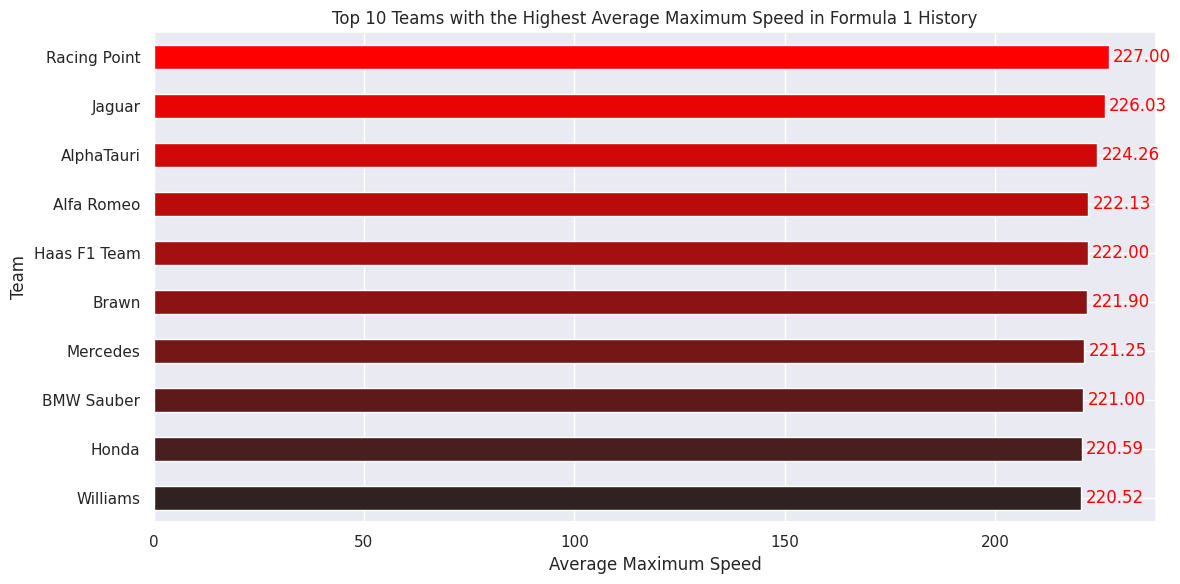

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'baseline' DataFrame

team_maxspeed = baseline.groupby('team')['max_speed'].mean()
top_team_maxspeed = team_maxspeed.sort_values(ascending=False).head(10)

# Reverse the order of the sorted values
top_team_maxspeed = top_team_maxspeed[::-1]

red_palette = sns.dark_palette("red", reverse=False, n_colors=len(top_team_maxspeed))
plt.figure(figsize=(12, 6))

# Use barh for horizontal bar chart
top_team_maxspeed.plot(kind='barh', color=red_palette)

plt.xlabel('Average Maximum Speed')
plt.ylabel('Team')
plt.title('Top 10 Teams with the Highest Average Maximum Speed in Formula 1 History')

# Add value labels on each bar
for i, value in enumerate(top_team_maxspeed):
    plt.text(value + 1, i, f'{value:.2f}', color='red', ha='left', va='center')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


###Q5. Bar Plot of Races per Team

In [82]:
the_best_teams = baseline[['team','points','racerId']]
the_best_teams = baseline.groupby('team')['racerId'].nunique().sort_values(ascending = False).reset_index(name = 'races')
the_best_teams = the_best_teams[the_best_teams['races'] >= 100]
the_best_teams

,team,races
0,Ferrari,206
1,Red Bull,166
2,McLaren,153
3,Mercedes,149
4,Williams,109


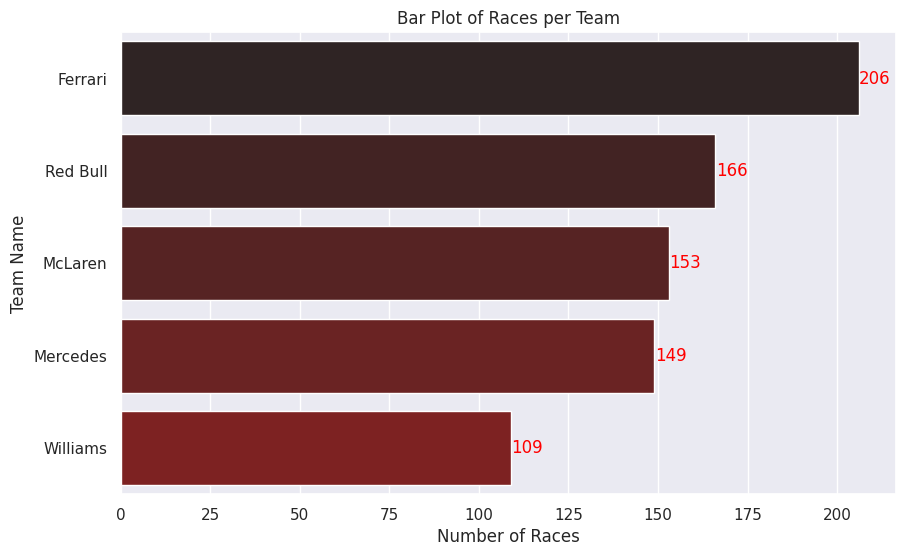

In [83]:
red_palette = sns.dark_palette("red", reverse=False, n_colors=len(top_team))
# Membuat diagram batang
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='races', y='team', data=the_best_teams, palette=red_palette)

# Menambahkan jumlah di dalam setiap batang
for i, v in enumerate(the_best_teams['races']):
    ax.text(v + 0.1, i, str(v), color='red', ha='left', va='center')

plt.xlabel('Number of Races')
plt.ylabel('Team Name')
plt.title('Bar Plot of Races per Team')
plt.show()

In [84]:
baseline

,resultId,racerId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,nationality,driverStandingsId,position,wins,team,driver_name,age,age_group
0,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,British,1,1,1,McLaren,Lewis Hamilton,39.0,36-40
1,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,British,9,1,1,McLaren,Lewis Hamilton,39.0,36-40
2,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,British,27,3,1,McLaren,Lewis Hamilton,39.0,36-40
3,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,British,48,2,1,McLaren,Lewis Hamilton,39.0,36-40
4,1,18,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,British,69,3,1,McLaren,Lewis Hamilton,39.0,36-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363488,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,Dutch,72079,19,0,AlphaTauri,Nyck de Vries,29.0,26-30
1363489,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,Dutch,72119,20,0,AlphaTauri,Nyck de Vries,29.0,26-30
1363490,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,Dutch,72139,20,0,AlphaTauri,Nyck de Vries,29.0,26-30
1363491,26042,1108,213,21.0,18,17,0.0,52,5150066.0,48.0,18.0,229.636,Dutch,72159,20,0,AlphaTauri,Nyck de Vries,29.0,26-30


#Models

In [85]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(X1_train)
X1_train = std.transform(X1_train)
X1_test = std.transform(X1_test)
X1_validation = std.transform(X1_validation)

In [86]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(X2_train)
X2_train = std.transform(X2_train)
X2_test = std.transform(X2_test)
X2_validation = std.transform(X2_validation)

In [87]:
# importing ML libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from xgboost import XGBClassifier

##Base

In [ ]:
# classification ML algorithms

lr = LogisticRegression(solver='sag')
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()
li = [lr,sgd,knn,gb]
d = {}
for i in li:
    i.fit(X1_train,y1_train)
    ypred = i.predict(X1_validation)
    print(i,":",accuracy_score(ypred,y1_validation)*100)
    d.update({str(i):i.score(X1_validation,y1_validation)*100})

In [ ]:
t = {}
for i in li:
    y_pred_test = i.predict(X1_test)
    print(i,":",accuracy_score(y_pred_test,y1_test)*100)
    t.update({str(i):i.score(X1_test,y1_test)*100})

In [ ]:
print('Training Data Results on df_base:')
for model, accuracy in d.items():
    print(f"{model}: {accuracy}")

print('\n------------------------\n')

print('Test Data Results on df_base:')
for model, accuracy in t.items():
    print(f"{model}: {accuracy}")

The results of data training and data test are not too different, it can be said to be a suitable model.


##IQR

In [ ]:
# classification ML algorithms

lr = LogisticRegression(solver='sag')
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()
li = [lr,sgd,knn,gb]
d1 = {}
for i in li:
    i.fit(X2_train,y2_train)
    ypred2 = i.predict(X2_validation)
    print(i,":",accuracy_score(ypred2,y2_validation)*100)
    d1.update({str(i):i.score(X2_validation,y2_validation)*100})

In [ ]:
t2 = {}
for i in li:
    y_pred_test2 = i.predict(X1_test)
    print(i,":",accuracy_score(y_pred_test2,y1_test)*100)
    t2.update({str(i):i.score(X1_test,y1_test)*100})

In [ ]:
print('Training Data Results on df_base:')
for model, accuracy in d1.items():
    print(f"{model}: {accuracy}")

print('\n------------------------\n')

print('Test Data Results on df_base:')
for model, accuracy in t2.items():
    print(f"{model}: {accuracy}")

The results of the data train become different when tried on the data test. Some models can be said to be overfitting because the accuracy results given are lower models compared to data train.

#Hyperparameter Tuning

##Base

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='accuracy')
knn_clf_gridcv.fit(X1_train, y1_train)

In [ ]:
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

##Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
X = df_base.drop(['resultId','racerId', 'constructorId', 'driverStandingsId', 'driver_name'], axis = 1)
y = df_base[['driver_name']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [ ]:
X = X_train
y = y_train

from sklearn.model_selection import KFold, cross_val_score


# Tentukan model-model yang akan digunakan
models = [
    ("KNN", KNeighborsClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB())
]


# Tentukan lipatan (fold) untuk cross-validation
n_folds = 5


# Tentukan scoring yang ingin digunakan (Accuracy)
scoring = 'accuracy'


# Lakukan cross-validation untuk setiap model
for name, model in models:
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

    print(f"{name}:")
    print(f"Accuracy: {np.mean(scores)} (Std: {np.std(scores)})")
    print("---------")

KNN is the best model!

#Business Reco

Based on the results of the analysis obtained:
1. Drivers can choose the team based on the number of points obtained and the maximum average of a car. Because their cars were made by the teams themselves in accordance with the rules and regulations set by the FIA.
2. As for the teams, if you want to choose the best drivers based on points can be seen based on their age and nationality. Although it does not rule out the possibility of an influence from other factors.
3. Sponsors can find the next sponsor target by using this prediction model, so that the sponsors given can be on target.
4. The audience can take part in gambling sites using this prediction model in order to maximize profits.
5. As a model performance test, it would be better if the model was applied in the next race match


#Conclusion

Dataset Formula 1 consists of 3,537,627 rows and 37 columns. The dataset has a missing value and outlier in several features. To change the non-numeric column to numeric, I labeled encoding for features and targets. After the Dataset Preprocessing data has 20 features. I divided the dataset into 80% of training data and 20% of test data, with training data divided into training and validation data.

I chose Logisticsregression, Kneighborsclassifier, Gaussiannb, and SGDClassifier as a model to predict the Winner of the Race based on outlier data that is not handled and the outlier data is handled. Add a standard scaler to improve the performance of the model with the final result. In data that is not handled outliers, the results of data train and data tests are not too different, it can be said to be a suitable model.

Whereas in the data handled by the outlier, the results of the data trains become different when tried on the data test. All models can be Said to be overfitting because the accuracy results given are lower comparated to data train. So we choose a data base for cross validation.

From this study we can conclude that the performance of the KNN model plays a very good role for train and test data on the base and IQR for hypertuning. Based on this model with the fold = 5 KNeighborsClassifier has the best performance based on the weighted average accuracy, with avalue of 0.9999935
